### Importing libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Importing Data

In [12]:
data = pd.read_csv('Stars.csv')
print(data.head())

   Temperature         L       R    A_M Color Spectral_Class  Type
0         3068  0.002400  0.1700  16.12   Red              M     0
1         3042  0.000500  0.1542  16.60   Red              M     0
2         2600  0.000300  0.1020  18.70   Red              M     0
3         2800  0.000200  0.1600  16.65   Red              M     0
4         1939  0.000138  0.1030  20.06   Red              M     0


### Data Manipulation

In [13]:
# Clean up the 'Color' category
color_mapping = {
    'Red': 'Red',
    'Orange-Red': 'Red',
    'Blue White': 'Blue White',
    'Blue white': 'Blue White',
    'Blue': 'Blue',
    'Blue-white': 'Blue White',
    'Blue-White': 'Blue White',
    'White': 'White',
    'Whitish': 'White',
    'white': 'White',
    'Yellowish White': 'Yellow Shade',
    'yellow-white': 'Yellow Shade',
    'White-Yellow': 'Yellow Shade',
    'yellowish': 'Yellow Shade',
    'Yellowish': 'Yellow Shade',
    'Pale yellow orange': 'Yellow Shade',
    'Orange': 'Red'
}
data['Category'] = data['Color'].map(color_mapping)
data = data.drop(['Color'], axis=1)
data = data.rename(columns={'Category': 'Color'})

In [14]:
# Encoding categorical features
le = LabelEncoder()
data['Color'] = le.fit_transform(data['Color'])
data['Spectral_Class'] = le.fit_transform(data['Spectral_Class'])

### Splitting The Data

In [15]:
X = data.drop(columns=['Type'])
y = data['Type']

### Standard Scaling

In [16]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

### Exploratory Data Analysis (EDA)

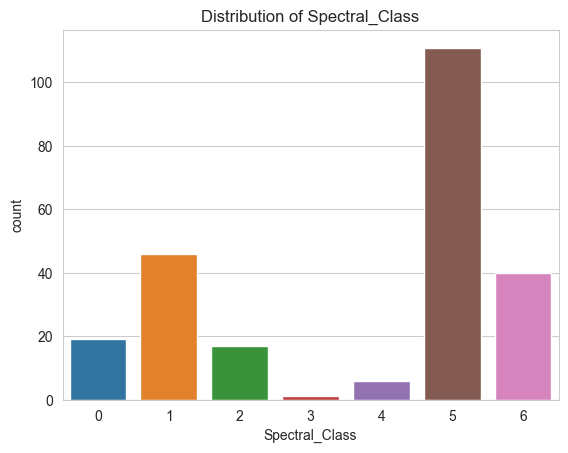

In [17]:
# Visualizing the Distribution of `Spectral_Class`
sns.countplot(x='Spectral_Class', data=data)
plt.title('Distribution of Spectral_Class')
plt.show()

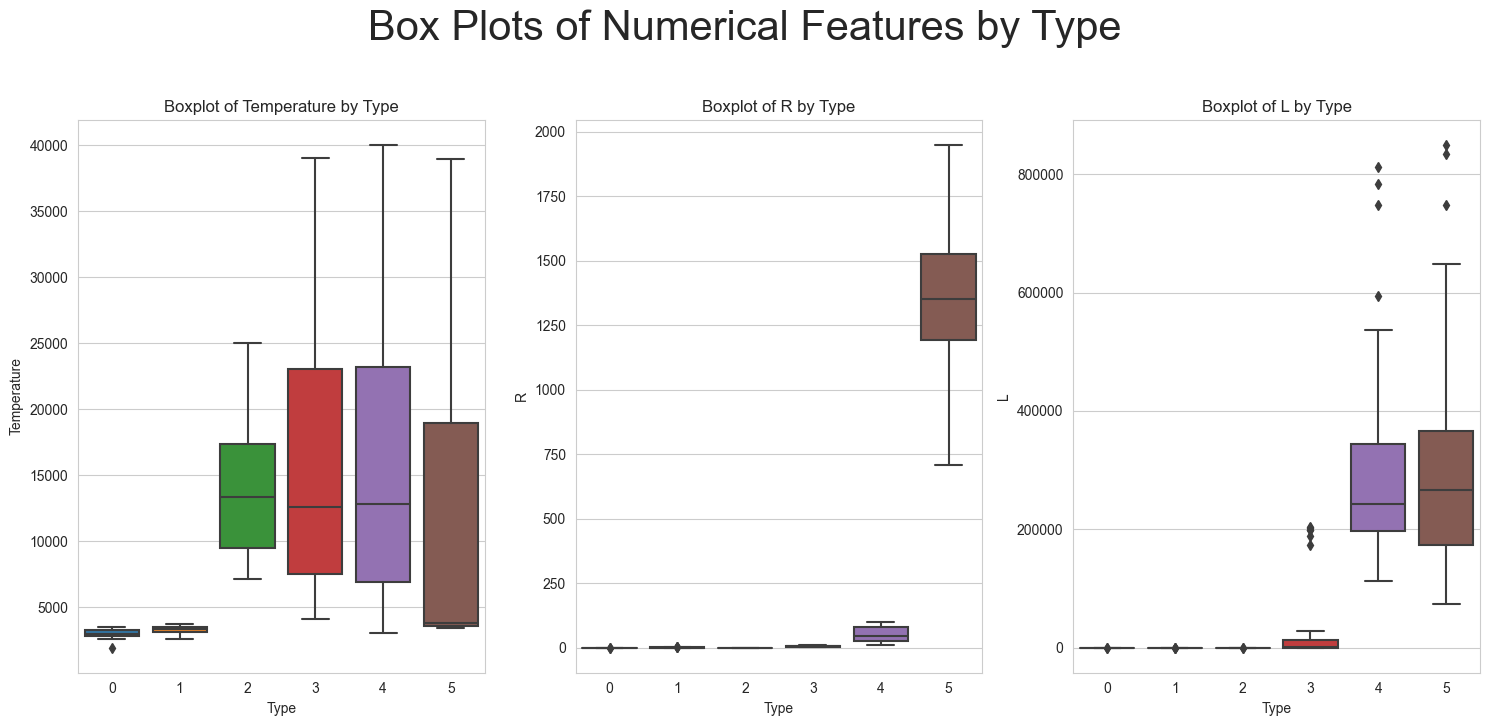

In [18]:
# Box Plots for Numerical Features
numerical_features = ['Temperature', 'R', 'L']
fig, axes = plt.subplots(1, 3, figsize=(15, 7))
for i, feature in enumerate(numerical_features):
    sns.boxplot(x='Type', y=feature, data=data, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature} by Type')
fig.suptitle('Box Plots of Numerical Features by Type', fontsize=30, y=1.03)
plt.tight_layout()
plt.show()

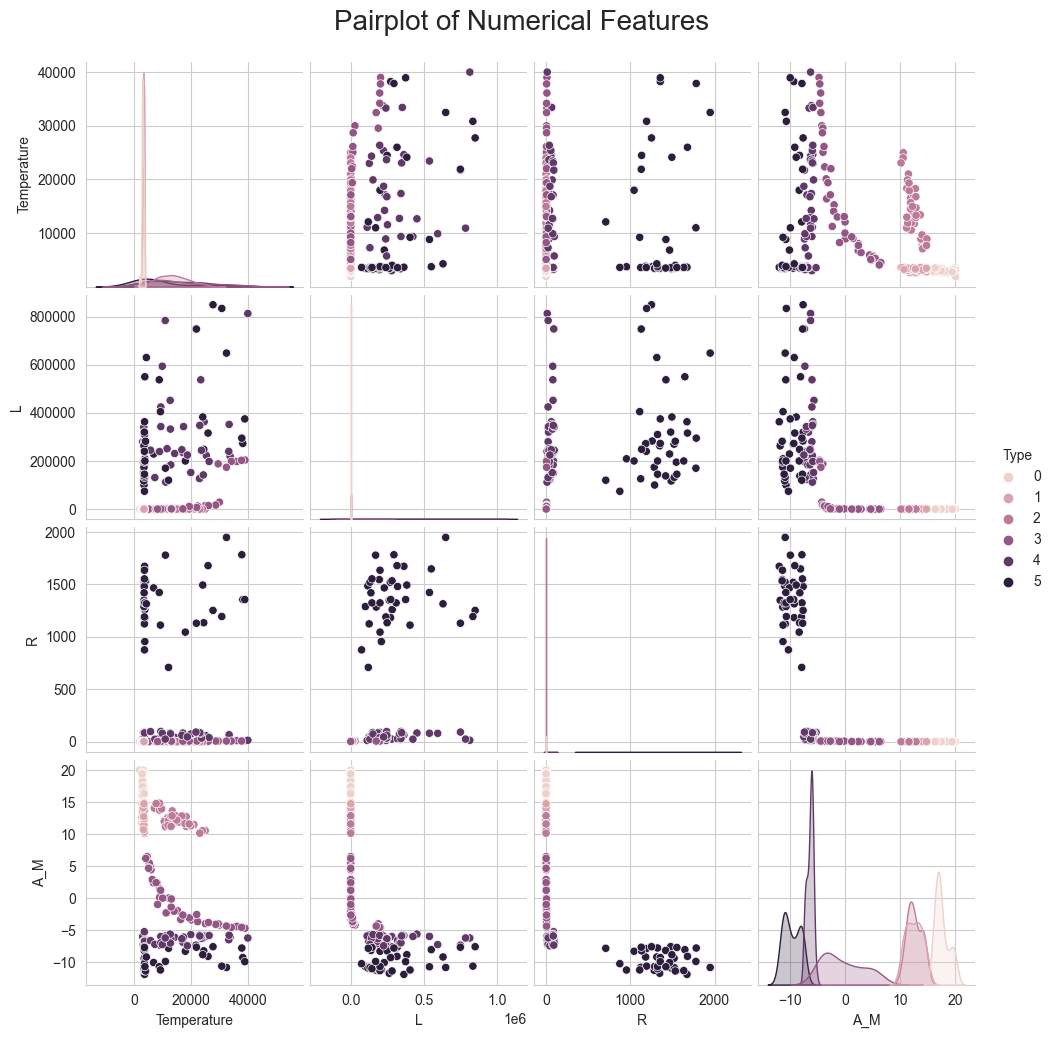

In [19]:
# Pair Plot for Numerical Features
pairplot_fig = sns.pairplot(data.drop(columns=['Color', 'Spectral_Class']), hue='Type')
pairplot_fig.fig.suptitle('Pairplot of Numerical Features', y=1.035, fontsize=20)
plt.show()

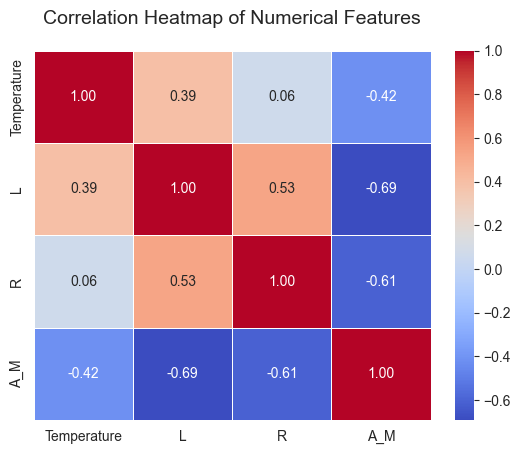

In [20]:
# Correlation heatmap
data_corr = data.drop(columns=['Color', 'Spectral_Class', 'Type']).corr()
sns.heatmap(data_corr, annot=True, fmt='0.2f', linewidth=0.45, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features', fontsize=14, y=1.05)
plt.show()

### Applying PCA

In [21]:
for n_components in [2, 3, 4]:
    pca = PCA(n_components=n_components)

    X_pca = pca.fit_transform(X_scaled)

    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    classifier = RandomForestClassifier(max_depth=5, random_state=42)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    explained_variance = pca.explained_variance_ratio_
    acc = accuracy_score(y_test, y_pred) * 100
    
    print(f"For {n_components} principal components:")
    print(f"Explained Variance: {explained_variance}")
    print(f"Accuracy: {round(acc,2)}%\n")

For 2 principal components:
Explained Variance: [0.45233769 0.23502199]
Accuracy: 87.5%

For 3 principal components:
Explained Variance: [0.45233769 0.23502199 0.16676394]
Accuracy: 93.75%

For 4 principal components:
Explained Variance: [0.45233769 0.23502199 0.16676394 0.05852166]
Accuracy: 97.92%
